# Exploratory Data Analysis

### Topic_1-3. Amazon Prime Movies and TV Shows

#### By. Gukhwan Hyun

About this Dataset: 
  * Amazon Prime is another one of the most popular media and video streaming platforms. They have close to 10000 movies or tv shows available on their platform, as of mid-2021, they have over 200M Subscribers globally. This tabular dataset consists of listings of all the movies and tv shows available on Amazon Prime, along with details such as - cast, directors, ratings, release year, duration, etc.

  [link text](https://www.kaggle.com/shivamb/amazon-prime-movies-and-tv-shows)

# Import Dataset

In [2]:
! pip install kaggle
! mkdir ~/.kaggle    
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json
! kaggle datasets download shivamb/amazon-prime-movies-and-tv-shows
! unzip amazon-prime-movies-and-tv-shows.zip

  0% 0.00/1.61M [00:00<?, ?B/s]
100% 1.61M/1.61M [00:00<00:00, 54.2MB/s]
Archive:  amazon-prime-movies-and-tv-shows.zip
  inflating: amazon_prime_titles.csv  


# Packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import missingno

# Load the dataset

In [3]:
dataset = pd.read_csv('/content/amazon_prime_titles.csv')
dataset

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,The Grand Seduction,Don McKellar,"Brendan Gleeson, Taylor Kitsch, Gordon Pinsent",Canada,"March 30, 2021",2014,NaN,113 min,"Comedy, Drama",A small fishing village must procure a local d...
1,s2,Movie,Take Care Good Night,Girish Joshi,"Mahesh Manjrekar, Abhay Mahajan, Sachin Khedekar",India,"March 30, 2021",2018,13+,110 min,"Drama, International",A Metro Family decides to fight a Cyber Crimin...
2,s3,Movie,Secrets of Deception,Josh Webber,"Tom Sizemore, Lorenzo Lamas, Robert LaSardo, R...",United States,"March 30, 2021",2017,NaN,74 min,"Action, Drama, Suspense",After a man discovers his wife is cheating on ...
3,s4,Movie,Pink: Staying True,Sonia Anderson,"Interviews with: Pink, Adele, Beyoncé, Britney...",United States,"March 30, 2021",2014,NaN,69 min,Documentary,"Pink breaks the mold once again, bringing her ..."
4,s5,Movie,Monster Maker,Giles Foster,"Harry Dean Stanton, Kieran O'Brien, George Cos...",United Kingdom,"March 30, 2021",1989,NaN,45 min,"Drama, Fantasy",Teenage Matt Banting wants to work with a famo...
...,...,...,...,...,...,...,...,...,...,...,...,...
9663,s9664,Movie,Pride Of The Bowery,Joseph H. Lewis,"Leo Gorcey, Bobby Jordan",NaN,NaN,1940,7+,60 min,Comedy,New York City street principles get an East Si...
9664,s9665,TV Show,Planet Patrol,NaN,"DICK VOSBURGH, RONNIE STEVENS, LIBBY MORRIS, M...",NaN,NaN,2018,13+,4 Seasons,TV Shows,"This is Earth, 2100AD - and these are the adve..."
9665,s9666,Movie,Outpost,Steve Barker,"Ray Stevenson, Julian Wadham, Richard Brake, M...",NaN,NaN,2008,R,90 min,Action,"In war-torn Eastern Europe, a world-weary grou..."
9666,s9667,TV Show,Maradona: Blessed Dream,NaN,"Esteban Recagno, Ezequiel Stremiz, Luciano Vit...",NaN,NaN,2021,TV-MA,1 Season,"Drama, Sports","The series tells the story of Diego Maradona, ..."


# Preprocessing

In [4]:
amazonprime = dataset.copy()
amazonprime.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9668 entries, 0 to 9667
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       9668 non-null   object
 1   type          9668 non-null   object
 2   title         9668 non-null   object
 3   director      7586 non-null   object
 4   cast          8435 non-null   object
 5   country       672 non-null    object
 6   date_added    155 non-null    object
 7   release_year  9668 non-null   int64 
 8   rating        9331 non-null   object
 9   duration      9668 non-null   object
 10  listed_in     9668 non-null   object
 11  description   9668 non-null   object
dtypes: int64(1), object(11)
memory usage: 906.5+ KB


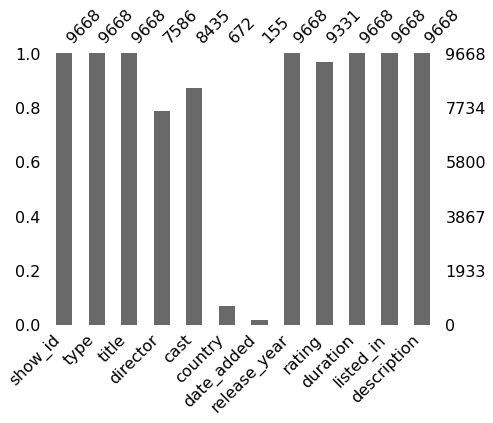

In [5]:
missingno.bar(amazonprime, figsize=(7,5));

## Handling missing values
  * 'date_added', 'country' columns have too many missing values

In [6]:
amazonprime.drop(columns=['date_added', 'country'], inplace=True)

amazonprime.director.fillna('Not Available', inplace=True)
amazonprime.cast.fillna('Not Available', inplace=True)
amazonprime.rating.fillna('Not Available', inplace=True)

In [7]:
amazonprime.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9668 entries, 0 to 9667
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       9668 non-null   object
 1   type          9668 non-null   object
 2   title         9668 non-null   object
 3   director      9668 non-null   object
 4   cast          9668 non-null   object
 5   release_year  9668 non-null   int64 
 6   rating        9668 non-null   object
 7   duration      9668 non-null   object
 8   listed_in     9668 non-null   object
 9   description   9668 non-null   object
dtypes: int64(1), object(9)
memory usage: 755.4+ KB


## Data Inspections

In [8]:
amazonprime.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'release_year',
       'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [9]:
col_names = amazonprime.columns

for col in col_names:
  if col not in ['show_id', 'title', 'release_year', 'description']:
    print(col, amazonprime[col].value_counts(), sep='\n')
    print('-'*100)

type
Movie      7814
TV Show    1854
Name: type, dtype: int64
----------------------------------------------------------------------------------------------------
director
Not Available                 2085
Mark Knight                    113
Cannis Holder                   61
Moonbug Entertainment           37
Jay Chapman                     34
                              ... 
Peter Kosminsky, Mary Soan       1
Avinash Pendurti                 1
Clea DuVall                      1
PAUL APEL PAPEL (DGN)            1
K. Subash                        1
Name: director, Length: 5774, dtype: int64
----------------------------------------------------------------------------------------------------
cast
Not Available                                                                                                                          1233
Maggie Binkley                                                                                                                           56
1             

From the output above, we can see that director, cast, listed_in columns needs to be parsed

In [10]:
amazonprime.describe()

,release_year
count,9668.000000
mean,2008.341849
std,18.922482
min,1920.000000
25%,2007.000000
50%,2016.000000
75%,2019.000000
max,2021.000000


## Parsing
  * director
  * cast
  * listed_in


In [11]:
def col_data_parser(col):
  amazonprime_cpy = amazonprime.copy()
  col_upper = col.upper()
  
  col_count = pd.concat([amazonprime_cpy, amazonprime[col].str.split(",", expand=True)], axis=1)
  
  col_count = col_count.melt(id_vars=['type', 'title'], 
                            value_vars=range(len(amazonprime[col].str.split(",", expand=True).columns)), 
                            value_name=col_upper)
  
  col_count = col_count[col_count[col_upper].notna()]
  col_count[col_upper] = col_count[col_upper].str.strip()
  col_count.drop(columns='variable', inplace=True)
  
  return col_count

In [12]:
print(col_data_parser('director'),
      col_data_parser('cast'),
      col_data_parser('listed_in'), 
      sep='\n'*2)

         type                 title           DIRECTOR
0       Movie   The Grand Seduction       Don McKellar
1       Movie  Take Care Good Night       Girish Joshi
2       Movie  Secrets of Deception        Josh Webber
3       Movie    Pink: Staying True     Sonia Anderson
4       Movie         Monster Maker       Giles Foster
...       ...                   ...                ...
120979  Movie        Toys Storage 2         Eunkyun ko
130647  Movie        Toys Storage 2      Anthony Leigh
140315  Movie        Toys Storage 2  Diana Reichenbach
149983  Movie        Toys Storage 2     Robin Tremblay
159651  Movie        Toys Storage 2     Marta Topolska

[10317 rows x 3 columns]

         type                    title                   CAST
0       Movie      The Grand Seduction        Brendan Gleeson
1       Movie     Take Care Good Night       Mahesh Manjrekar
2       Movie     Secrets of Deception           Tom Sizemore
3       Movie       Pink: Staying True  Interviews with: Pink
4  

In [13]:
director_df = col_data_parser('director')
cast_df = col_data_parser('cast')
genre_df = col_data_parser('listed_in')

In [14]:
director_df.shape, cast_df.shape, genre_df.shape

((10317, 3), (45600, 3), (18309, 3))

# EDA

## Visualization / Searching for Insight

In [15]:
amazonprime.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9668 entries, 0 to 9667
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       9668 non-null   object
 1   type          9668 non-null   object
 2   title         9668 non-null   object
 3   director      9668 non-null   object
 4   cast          9668 non-null   object
 5   release_year  9668 non-null   int64 
 6   rating        9668 non-null   object
 7   duration      9668 non-null   object
 8   listed_in     9668 non-null   object
 9   description   9668 non-null   object
dtypes: int64(1), object(9)
memory usage: 755.4+ KB


In [18]:
amazonprime.describe()

,release_year
count,9668.000000
mean,2008.341849
std,18.922482
min,1920.000000
25%,2007.000000
50%,2016.000000
75%,2019.000000
max,2021.000000


In [17]:
fig = px.histogram(amazonprime, x="release_year")
fig.update_layout(bargap=0.2)
fig.show();

### Most common director

In [29]:
director_df['DIRECTOR'].value_counts()

Not Available            2085
Mark Knight               114
Cannis Holder              62
Moonbug Entertainment      37
Jay Chapman                34
                         ... 
Vishwa Bhanu                1
Deborah Cardona             1
Robert Kiviat               1
Paul Maslak                 1
K. Subash                   1
Name: DIRECTOR, Length: 6217, dtype: int64

In [ ]:
amazonprime[amazonprime.director == 'Mark Knight']

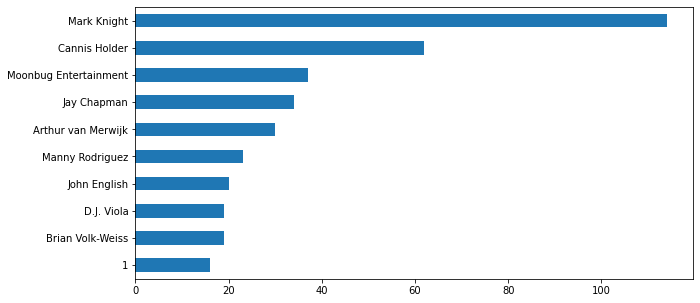

In [26]:
# Top 10
fig = plt.figure(figsize=(10,5))
director_df['DIRECTOR'].value_counts()[1:11].sort_values().plot(kind='barh');

### Most common cast

In [28]:
cast_df['CAST'].value_counts()

Not Available            1233
Maggie Binkley             56
1                          35
Gene Autry                 32
Nassar                     30
                         ... 
Dina Shihabi                1
Rachel Grubb                1
Caroline Burns Cooke        1
David Aaron Stone           1
Mary Elizabeth Rubens       1
Name: CAST, Length: 31850, dtype: int64

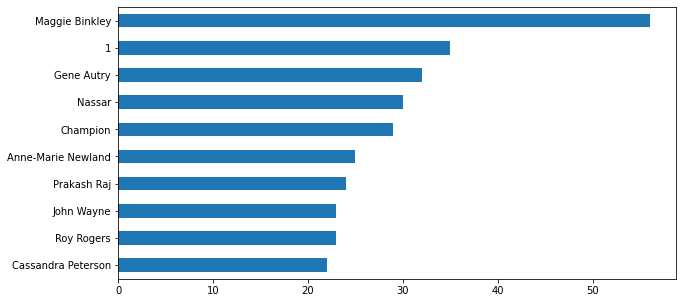

In [30]:
# Top 10
fig = plt.figure(figsize=(10,5))
cast_df['CAST'].value_counts()[1:11].sort_values().plot(kind='barh');

### Most common genre

In [31]:
genre_df['LISTED_IN'].value_counts()

Drama                        3687
Comedy                       2099
Action                       1657
Suspense                     1501
Kids                         1085
Documentary                   993
Special Interest              980
Horror                        875
Romance                       674
Animation                     547
and Culture                   483
Arts                          483
Entertainment                 483
Science Fiction               457
International                 355
TV Shows                      263
Adventure                     259
Western                       234
Sports                        160
Music Videos and Concerts     155
Unscripted                    152
Arthouse                      141
LGBTQ                         113
Young Adult Audience           87
Fitness                        83
Anime                          80
Fantasy                        68
Faith and Spirituality         66
Military and War               44
Historical    

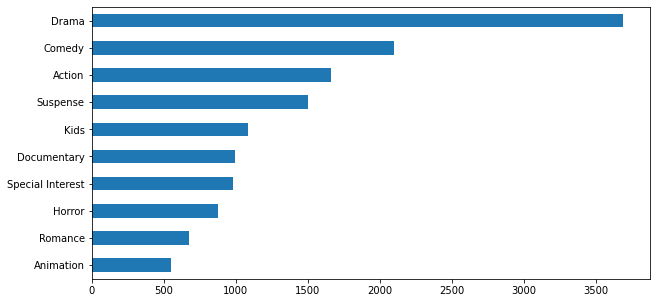

In [32]:
# Top 10
fig = plt.figure(figsize=(10,5))
genre_df['LISTED_IN'].value_counts()[:10].sort_values().plot(kind='barh');

### Types of contents

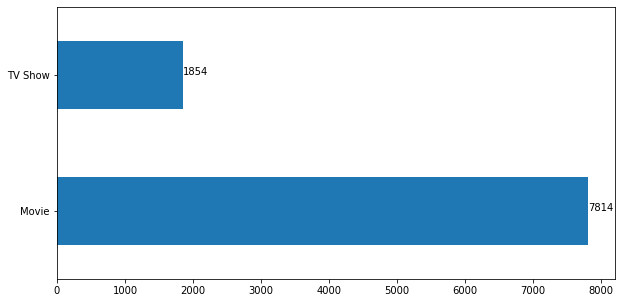

In [33]:
fig = plt.figure(figsize=(10,5))
amazonprime['type'].value_counts().plot(kind='barh')
for index, value in enumerate(amazonprime['type'].value_counts().values):
    plt.text(value, index, str(value))

### Most common rating

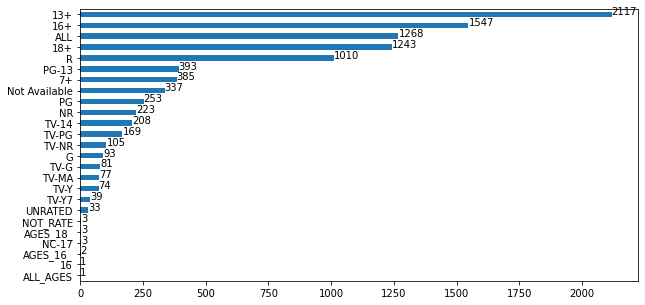

In [34]:
fig = plt.figure(figsize=(10,5))
amazonprime['rating'].value_counts().sort_values().plot(kind='barh')
for index, value in enumerate(amazonprime['rating'].value_counts().sort_values().values):
    plt.text(value, index, str(value));

### Duration distribution

In [35]:
amazonprime['duration'].value_counts()

1 Season      1342
2 Seasons      229
90 min         223
91 min         220
92 min         203
              ... 
181 min          1
19 Seasons       1
29 Seasons       1
209 min          1
21 Seasons       1
Name: duration, Length: 219, dtype: int64

In [36]:
season_duration = amazonprime['duration'][amazonprime['duration'].str.contains('Season')].value_counts()
season_duration

1 Season      1342
2 Seasons      229
3 Seasons      110
4 Seasons       62
5 Seasons       39
6 Seasons       23
7 Seasons       15
8 Seasons       10
9 Seasons        6
10 Seasons       5
14 Seasons       3
11 Seasons       3
12 Seasons       3
29 Seasons       1
19 Seasons       1
15 Seasons       1
21 Seasons       1
Name: duration, dtype: int64

In [38]:
print(np.sum(season_duration.values, axis=0))
132 / 1854

1854


0.07119741100323625

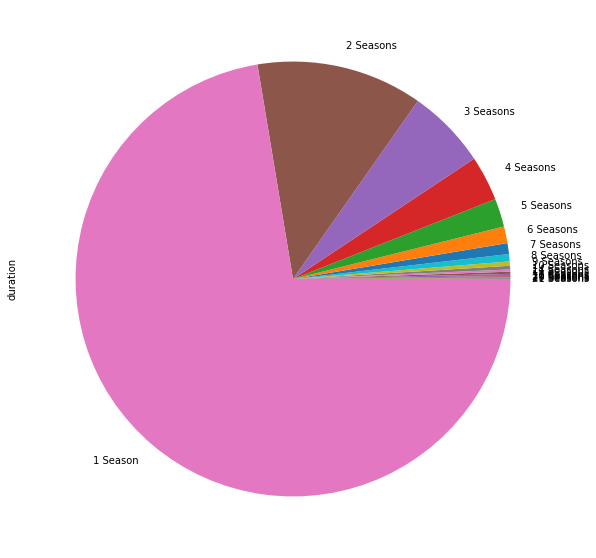

In [39]:
fig = plt.figure(figsize=(15,10))
season_duration.sort_values().plot(kind='pie');

In [40]:
time_duration = amazonprime['duration'][amazonprime['duration'].str.contains('min')].value_counts()
time_duration

90 min     223
91 min     220
92 min     203
89 min     195
88 min     188
          ... 
479 min      1
601 min      1
269 min      1
192 min      1
209 min      1
Name: duration, Length: 202, dtype: int64

### Persona
* Most common directors' persona?

In [41]:
def find_persona(director_name):
  actors =[]
  persona = pd.merge(director_df, cast_df, how='left', on='title')
  for actor in persona[persona['DIRECTOR'] == director_name]['CAST'].values:
    if actor != 'Not Available':
      actors.append(actor)
  return pd.Series(actors).value_counts()

In [45]:
top10directors = director_df['DIRECTOR'].value_counts()[1:11].index.to_list()

In [46]:
for dic in top10directors:
  print('Director = ', dic) 
  print('Actors = ', find_persona(dic), sep='\n')
  print()

Director =  Mark Knight
Actors = 
Anne-Marie Newland         24
Mary Kay Kayaltizer         6
Dr Daniel J Nightingale     3
Kimiko Ishizaka             2
Sarah Lærke                 1
Marie-Anne Newland          1
Caroline Shola Arewa        1
Nick Mortorano              1
Niv Dayan                   1
Ken Elkinson                1
Jamie Newland               1
Phd                         1
Steves Bedroom Band         1
Ben Leinbach                1
Ann-Marie Newland           1
dtype: int64

Director =  Cannis Holder
Actors = 
Grace Tamayo    17
Erin Webbs      17
Jacus            1
Cow              1
Mia              1
Baby Panda       1
dtype: int64

Director =  Moonbug Entertainment
Actors = 
Stevin John    1
Stevin john    1
dtype: int64

Director =  Jay Chapman
Actors = 
Tom Papa               2
Gary Gulman            1
Joey Wellis            1
Iliza Shlesinger       1
Kevin Hart             1
Tom Segura             1
Nick Di Paolo          1
Josh Blue              1
Craig Fergus

### Most common directors per genre

In [47]:
def find_popular_director_gen(genre_name):
  directors = []
  director_genre = pd.merge(genre_df, director_df, how='left', on='title')
  for director in director_genre[director_genre['LISTED_IN'] == genre_name]['DIRECTOR'].values:
    if director != 'Not Available':
      directors.append(director)
  return pd.Series(directors).value_counts()

In [49]:
find_popular_director_gen('Drama')

William Wyler        10
Percy Adlon           9
Yash Chopra           8
Krishnan-Panju        8
Shiva Nirvana         7
                     ..
Girish Mohite         1
Roberto Rodríguez     1
Leah Walker           1
Scott Ziehl           1
Dan Moss              1
Length: 2867, dtype: int64

In [50]:
find_popular_director_gen('Action')

1                            14
Mohana Krishna Indraganti     6
Anthony C. Ferrante           6
Prashanth Neel                5
Hark Tsui                     5
                             ..
Fred Dekker                   1
Chris Bucher                  1
Richard Lester                1
Audrey Cummings               1
K. Subash                     1
Length: 1360, dtype: int64

### Most common actors per genre

In [52]:
def find_popular_actor_gen(genre_name):
  actors = []
  actor_genre = pd.merge(genre_df, cast_df, how='left', on='title')
  for actor in actor_genre[actor_genre['LISTED_IN'] == genre_name]['CAST'].values:
    if actor != 'Not Available':
      actors.append(actor)
  return pd.Series(actors).value_counts()

In [53]:
find_popular_actor_gen('Drama')

Prakash Raj      19
Nassar           19
Manorama         13
Vijay            13
Nani             13
                 ..
Athony Dilio      1
Garry Owen        1
Nathan Corbin     1
Tony Sibbald      1
                  1
Length: 16404, dtype: int64

In [54]:
find_popular_actor_gen('Action')

1                 20
Prakash Raj       14
Danny Trejo       14
Steven Seagal     12
Dolph Lundgren    11
                  ..
Devon Bostick      1
Tara Eloise        1
Steven Yeun        1
James Cahill       1
Akai Draco         1
Length: 7362, dtype: int64

### Most demanding actor, director in last 5 years

In [57]:
def col_data_parser2(col):
  amazonprime_cpy = amazonprime.copy()
  col_upper = col.upper()
  
  col_count = pd.concat([amazonprime_cpy, amazonprime[col].str.split(",", expand=True)], axis=1)
  
  col_count = col_count.melt(id_vars=['type', 'title','release_year'], 
                            value_vars=range(len(amazonprime[col].str.split(",", expand=True).columns)), 
                            value_name=col_upper)
  
  col_count = col_count[col_count[col_upper].notna()]
  col_count[col_upper] = col_count[col_upper].str.strip()
  col_count.drop(columns='variable', inplace=True)
  
  return col_count

In [58]:
year_director = col_data_parser2('director')
year_actor = col_data_parser2('cast')

In [65]:
year_director[(year_director['release_year'] == 2021) |
           (year_director['release_year'] == 2020) |
           (year_director['release_year'] == 2019) |
           (year_director['release_year'] == 2018) |
           (year_director['release_year'] == 2017)]['DIRECTOR'].value_counts()[1:12]

Cannis Holder            59
Mark Knight              53
Moonbug Entertainment    36
Arthur van Merwijk       30
Brian Volk-Weiss         19
1                        16
Nick Hatton Jones        14
Richard Hickey           14
Aaron Michael            11
Pinkfong                 11
Bruce Legg               10
Name: DIRECTOR, dtype: int64

In [80]:
year_actor[year_actor.release_year.isin([yr for yr in range(2017,2022)])]['CAST'].value_counts()[1:12]

Maggie Binkley    51
1                 35
Nassar            18
Ph.D.             18
Erin Webbs        17
Prakash Raj       16
Grace Tamayo      16
Nani              13
LB                13
Nayanthara        12
Kaali Venkat      11
Name: CAST, dtype: int64